<a href="https://colab.research.google.com/github/nsthomp5/MAT422/blob/main/MAT_422_HW_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Name: Nicholas Thompson
# ID: 1223100502
# Class: MAT 422
# Assignment: HW 2.3

In [46]:

from google.colab import drive # for pulling data from spreadsheet
drive.mount('/content/drive', force_remount = True)


Mounted at /content/drive


In [114]:
import numpy as np
import random as rd
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import StandardScaler

Joint Probability Distributions are a probability distribution of two or more events. The following example shows how independent events form a probability distribution, where the probability of one event occuring has no bearing on the probability of the other event occuring. The following examples showcase this. For joint distributions where conditional probability becomes involved, using techniques like Bayesian Networks becomes necessary.

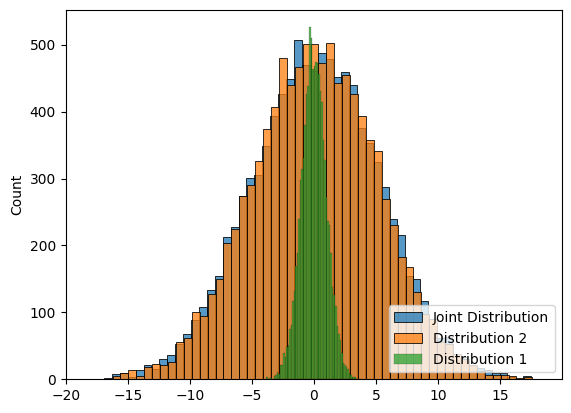

array([[1.01338018e+00, 2.44092096e-02],
       [2.44092096e-02, 2.54203408e+01]])

In [47]:
# 2.3.1 Joint Probability Distributions
# Example 1: Independent Variables

dist1 = np.random.normal(0, 1, 10000) # two normal distributions with different standard deviations
dist2 = np.random.normal(0, 5, 10000)
x = np.linspace(-10, 10, 10000)


sns.histplot(dist1+dist2, label = 'Joint Distribution') # plot of distribution of sum of both variables
sns.histplot(dist2, label='Distribution 2')
sns.histplot(dist1, label='Distribution 1')
plt.legend(loc = 'lower right')
plt.show()

np.cov(dist1,dist2)

<Axes: ylabel='Count'>

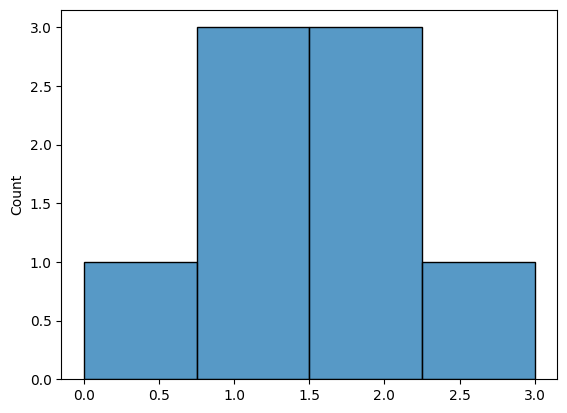

In [48]:
# Example 2: Discrete Events: Flipping 3 coins


heads = [0, 1, 1, 1, 2, 2, 2, 3] # weighted possible number of heads flipping 3 coins

np.mean(heads)
np.std(heads)

sns.histplot(heads)

Correlation determines how one variable is related to another. It does not imply a directional causal relationship, rather using the error of a data point from the line of best fit for a linear relationship between two variables to determine how related the values of both variables for each subject are. The following example shows how baseball statistics can be correlated.

The correlation coefficient between each MLB hitter's 2-month differences in SEAGER and OPS from 2021-2024 is 0.17907984192094495
The correlation coefficient between each MLB hitter's 3-month differences in SEAGER and Z-O Swing % from 2021-2024 is 0.3293495893801321


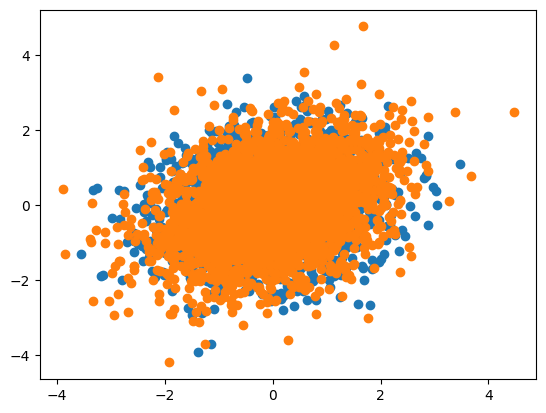

In [94]:
# 2.3.2 Correlation and Dependence
# Example 1: Baseball Stats

m2df = pd.read_csv('/content/drive/My Drive/Baseball Stats/SEAGER_monthly_data - 2m.csv')
m3df = pd.read_csv('/content/drive/My Drive/Baseball Stats/SEAGER_monthly_data - 3m.csv')

seager_m2 = m2df['ΔSEAGER - 2m'] # data structuring
ops_m2 = m2df['ΔOPS - 2m']

seager_m3 = m3df['ΔSEAGER - 3m']
zo_m3 = m3df['ΔZ-O% - 3m']

seager_m2 = seager_m2.dropna() # removing missing values (missing values are in both or no variables simultaneously)
ops_m2 = ops_m2.dropna()

seager_m3 = seager_m3.dropna()
zo_m3 = zo_m3.dropna()

scaler = StandardScaler() # rescaling to put both variables on same scale
scaler.fit(seager_m2.values.reshape(-1,1))
seager_m2 = scaler.transform(seager_m2.values.reshape(-1,1))
scaler.fit(ops_m2.values.reshape(-1,1))
ops_m2 = scaler.transform(ops_m2.values.reshape(-1,1))
scaler.fit(seager_m3.values.reshape(-1,1))
seager_m3 = scaler.transform(seager_m3.values.reshape(-1,1))
scaler.fit(zo_m3.values.reshape(-1,1))
zo_m3 = scaler.transform(zo_m3.values.reshape(-1,1))

seager_m2 = seager_m2.flatten()
ops_m2 = ops_m2.flatten()
seager_m3 = seager_m3.flatten()
zo_m3 = zo_m3.flatten()

plt.scatter(seager_m2, ops_m2)
plt.scatter(seager_m3, zo_m3)

print("The correlation coefficient between each MLB hitter's 2-month differences in SEAGER and OPS from 2021-2024 is " + str(np.corrcoef(seager_m2, ops_m2)[0,1]))
print("The correlation coefficient between each MLB hitter's 3-month differences in SEAGER and Z-O Swing % from 2021-2024 is " + str(np.corrcoef(seager_m3, zo_m3)[0,1]))



The Central Limit Theorem says that sampling more from a distribution causes the means of each sample to tend more towards a normal distribution, regardless of the original sample distribution. The following example shows how the distribution of sample means for a non-normal distribution still tends towards a normal distribution as more samples are taken.

KeyboardInterrupt: 

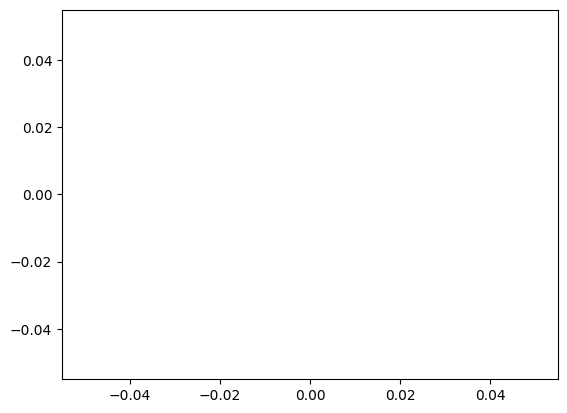

In [142]:
# 2.3.3 Random Samples
# Example 1: Central Limit Theorem

np.random.seed(154)

sampledist = np.linspace(0, 1, 100)
sampledist = sorted(sampledist)

sample_means = []

sns.histplot(sample_means)

while i in range (3): # 10 sample means
  random_sample = np.mean(rd.sample(sampledist, 10))

sns.histplot(random_sample)

while i in range (10): # 100 sample means
  random_sample = np.mean(rd.sample(sampledist, 10))

sns.histplot(random_sample)

while i in range (30): # 1000 sample means
  random_sample = np.mean(rd.sample(sampledist, 10))

sns.histplot(random_sample)